In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [89]:
# Reading the csv file in a dataframe
df = pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [90]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [91]:
#Checking the dimensions of the dataframe
df.shape

(32560, 15)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [93]:
# Checking the types of the dataset
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

out of 15 columns, 6 are numeric data variables and 9 are categorical data variables.And we need to tranform these categorical data variables to numeric format

In [94]:
# Checking the unique values in each column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [95]:
# Checking null values in the dataset.
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

there is no null value present in dataset

In [96]:
# Checking the value_counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

 ok here we can see the columns having '?' are 'Workclass','Occupation','Native_country' and they all are categorical variables. So,they are nothing but a nun values  we can fill them with "Most Frequently occuring values" of the respective columns i.e mode values, or we can drop them but here we will use mode method

In [97]:
# from value count we can see mode of the data so we will replace it
df['Workclass'] = df.Workclass.str.replace('?','Private')
df['Occupation'] = df.Occupation.str.replace('?','Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?','United-States')

In [98]:
# we will recheck it 
# Checking the value_counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


9     10501
10   

so the ? is removede

In [99]:
# Statistical summary of the dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


as we can observe there is lot of 0 value present in capital_gain and capital_loss column hence we will drop it
Also The mean is greater than the median(50%)in some columns which means they are skewed to the right.

The mean and the median(50%) are almost equal in Education_num and Hours_per_week which means the data is symmetric in these columns hence the data is normal and no skewness present here.

There is a huge difference in 75% amd max it shows that huge outliers are present in the columns.

In summarizing the data we can observe that the dataset contains the person's age between 17 years to 90 years.

In [100]:
# Dropping the columns having more no. of '0s'
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

In [101]:
# checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [102]:
# checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


# Data Visualization

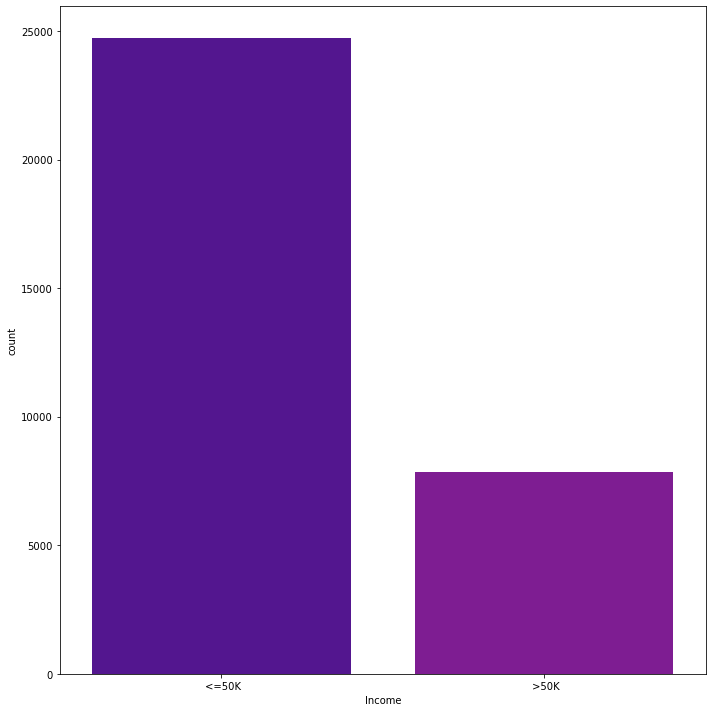

In [103]:
#Univariate Analysis:
# Visualizing our target column.
plt.figure(figsize=(10,10))
sns.countplot(df['Income'])
plt.show()

Most of the people have the income less than or equal to 50K. We can also observr the class is imbalance and hence needs to balance it before model building.

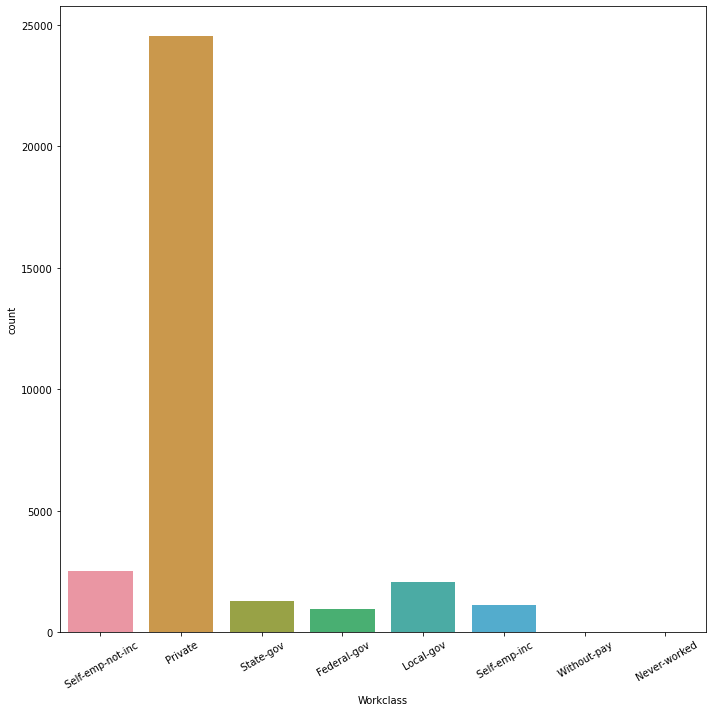

In [104]:
plt.figure(figsize=(10,10))
sns.countplot(df['Workclass'])
plt.xticks(rotation=30)
plt.show()

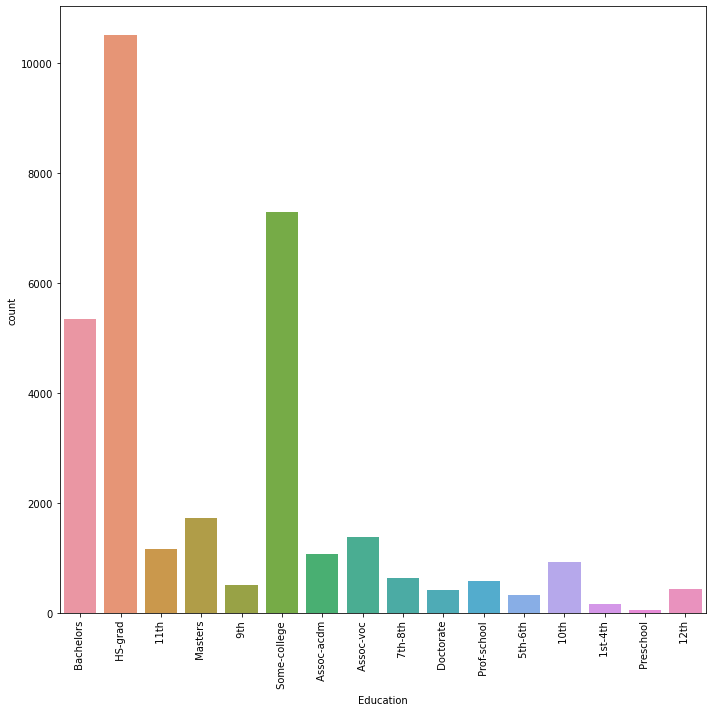

In [105]:
# Visualizing the count of Education of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

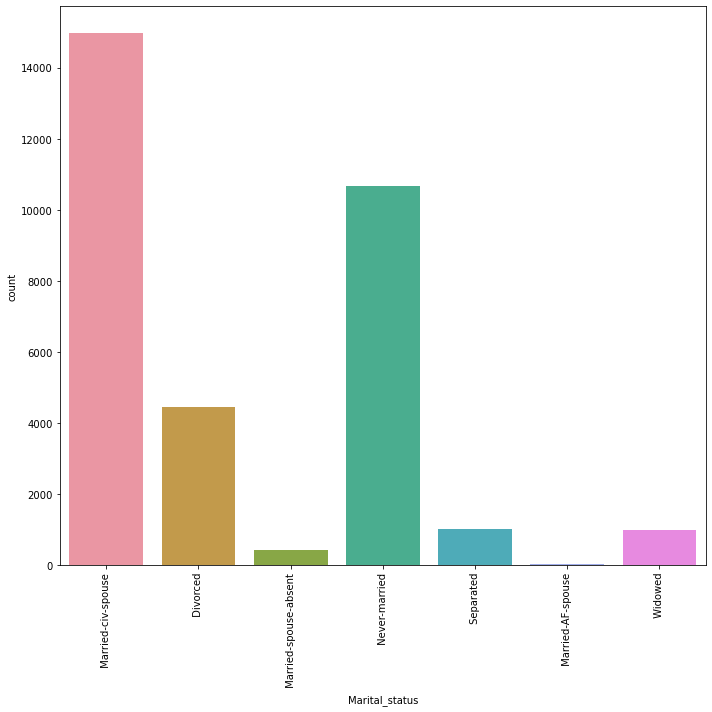

In [106]:
# Visualizing the count of Marital_status of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)
plt.show()

The people who got married have high counts followed by the singles or nevermarried.

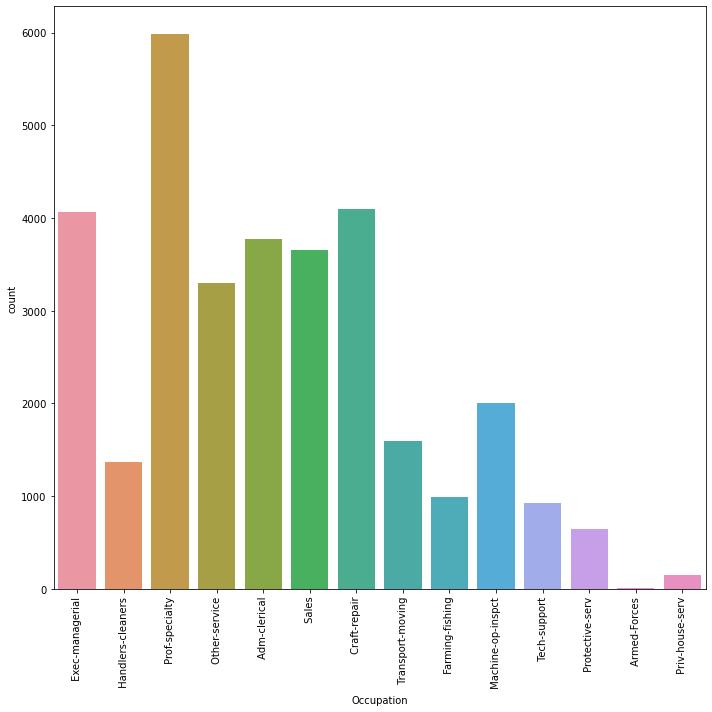

In [107]:
# Visualizing the count of Occupation of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Occupation'])
plt.xticks(rotation=90)
plt.show()

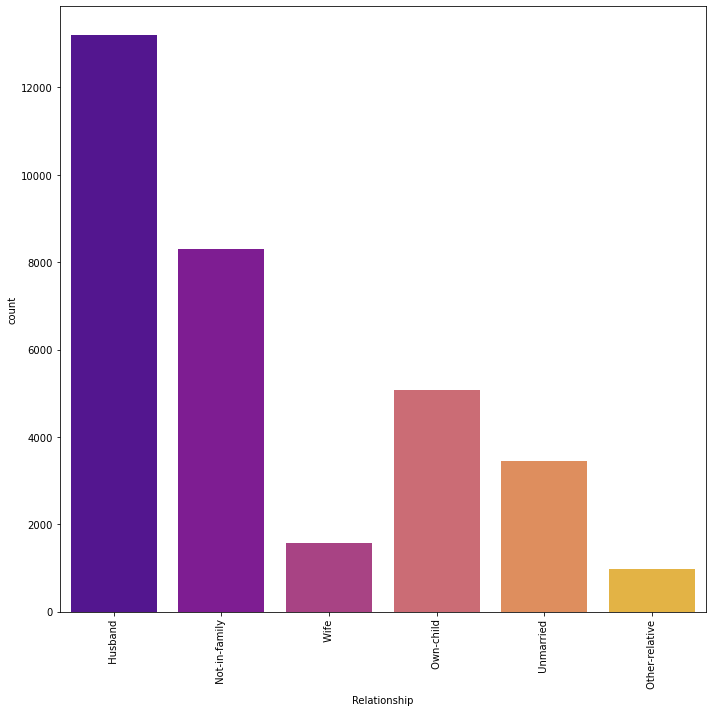

In [108]:
# Visualizing the count of Relationship of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Relationship'])
plt.xticks(rotation=90)
plt.show()

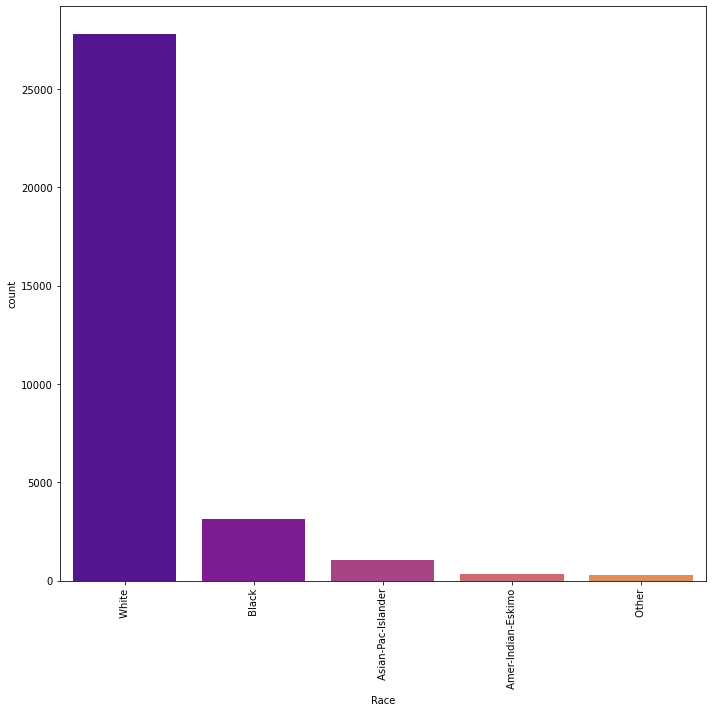

In [109]:
# Visualizing the count of Race of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Race'])
plt.xticks(rotation=90)
plt.show()

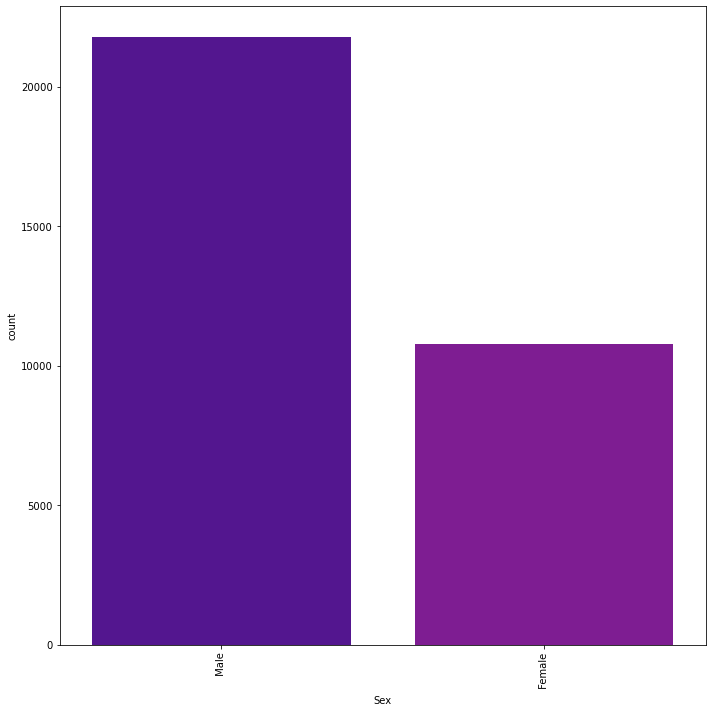

In [110]:
# Visualizing the count of Sex of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Sex'])
plt.xticks(rotation=90)
plt.show()

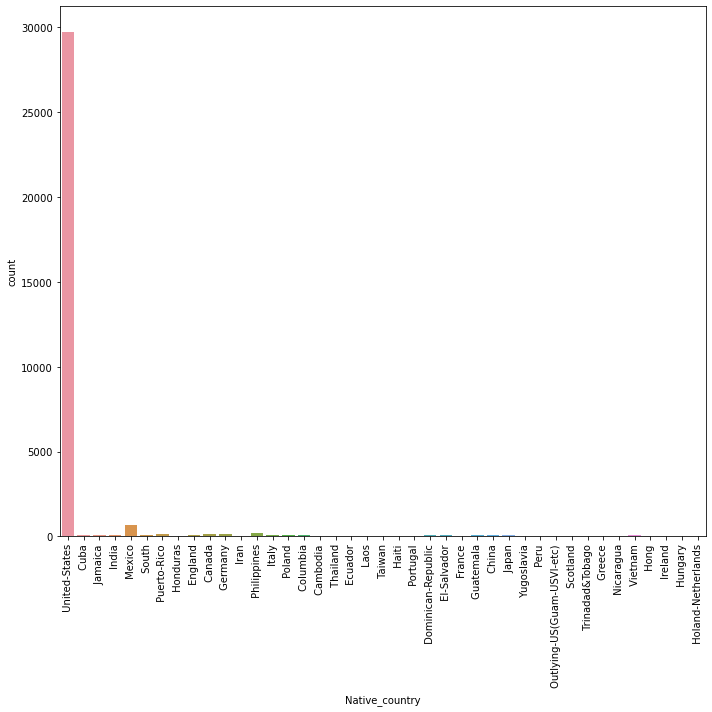

In [111]:
# Visualizing the count of Native_country of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

The United States Country has the highest count

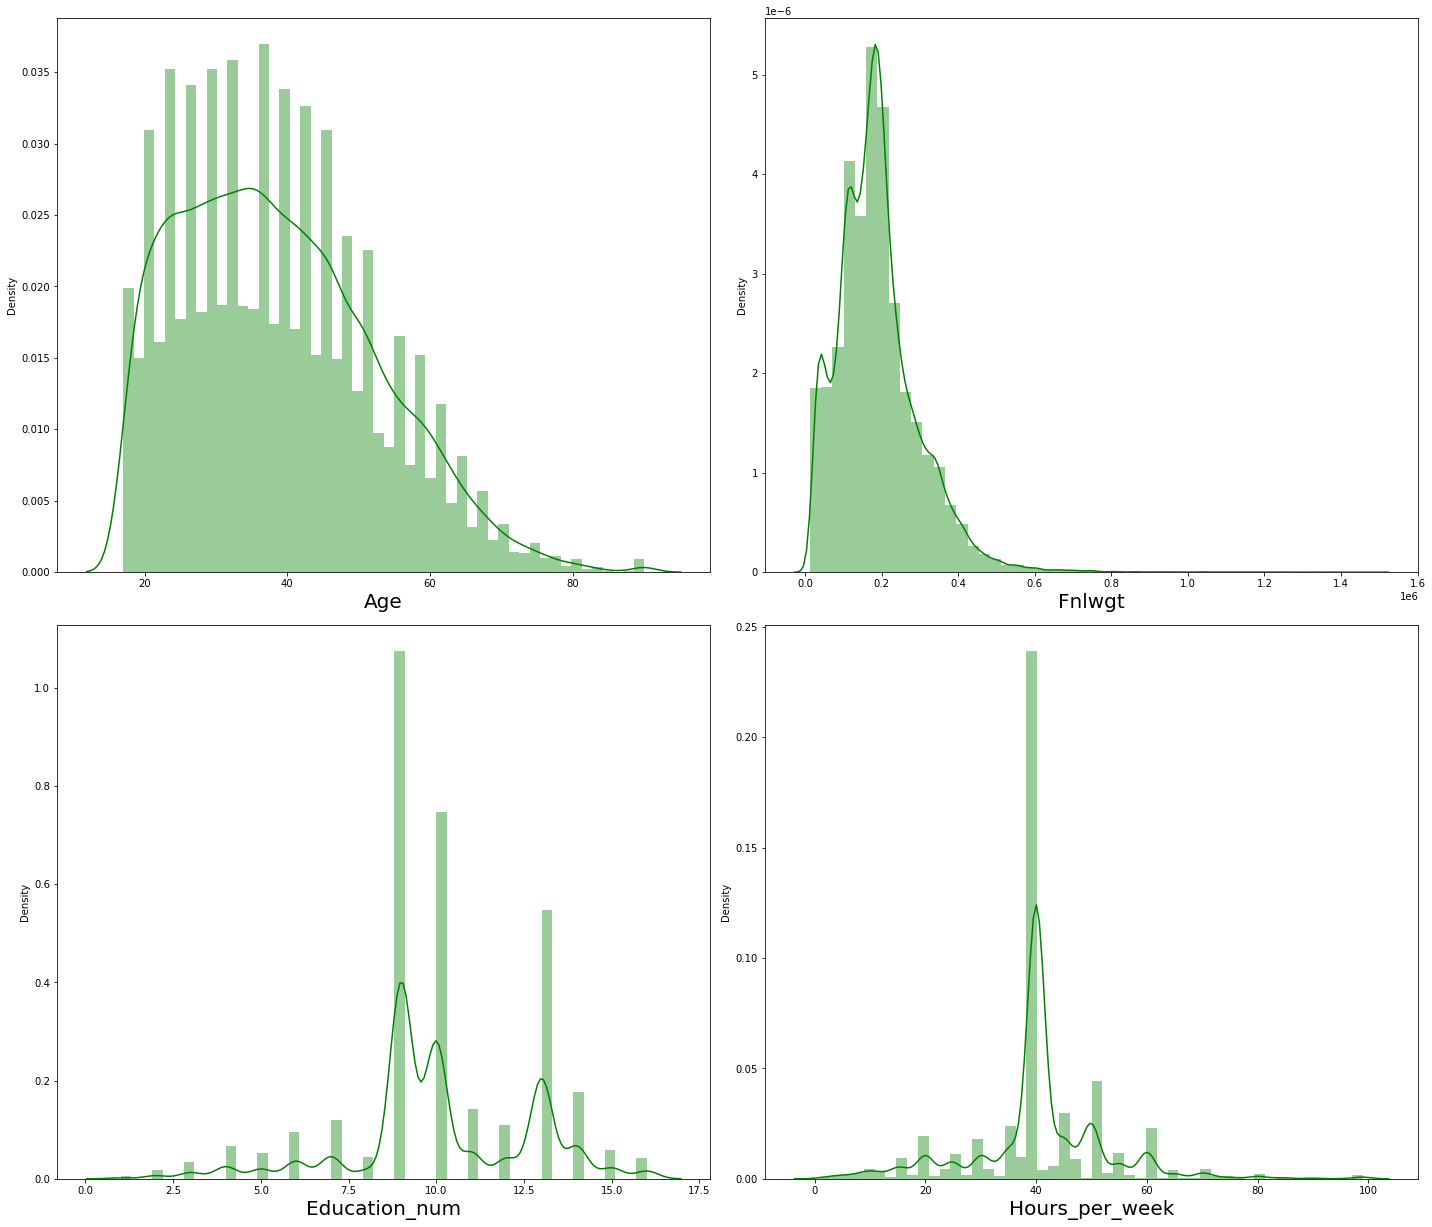

In [112]:
# Checking the distribution of data in each numric column

plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for col in numerical_col:
    if plotnumber<6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Bivariate Analysis

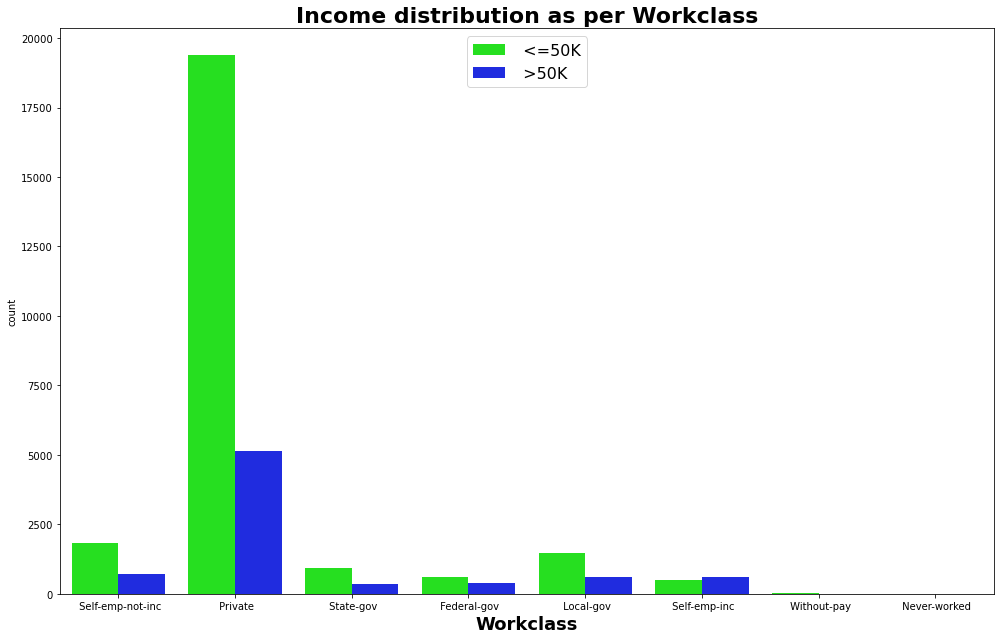

In [113]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Workclass'], hue=df['Income'], palette='hsv')
plt.title('Income distribution as per Workclass', fontsize=22, fontweight='bold')
p.set_xlabel('Workclass',fontsize=18,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

The people having gov sector jobs(State gov, Federal gov,Local gov) with high education number have the income >50K, also the Private sector position with average education number have second highest income >=50K.

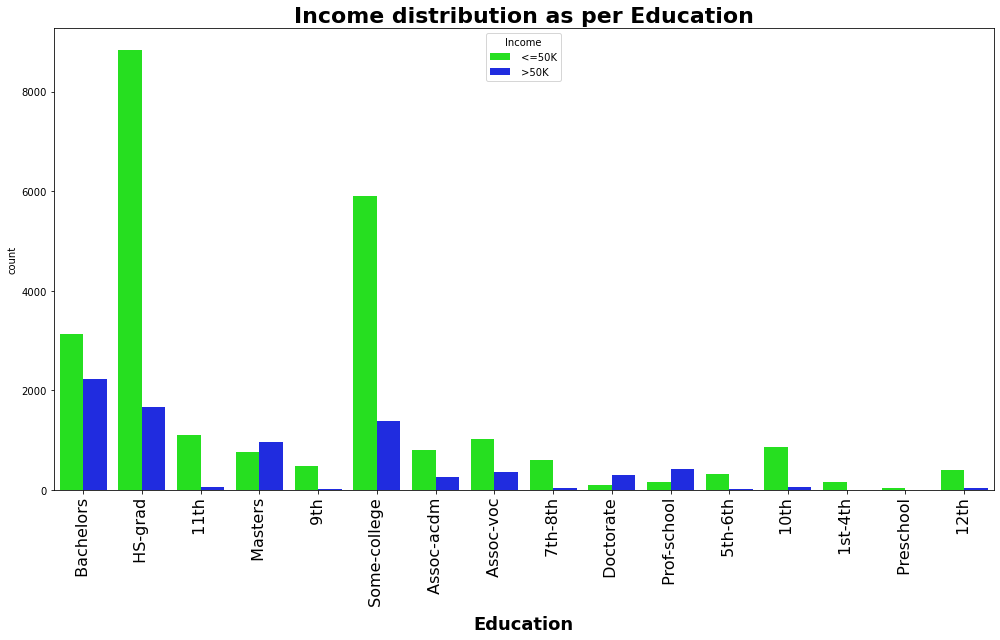

In [114]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Education'], hue=df['Income'], palette='hsv')
plt.title('Income distribution as per Education', fontsize=22, fontweight='bold')
p.set_xlabel('Education',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=90)
plt.show()


In case of people belonging to Masters, Doctorate and Prof-School category in the education level, the number people earning more than 50K dollars an year outnumber than the number of people earning less than it.

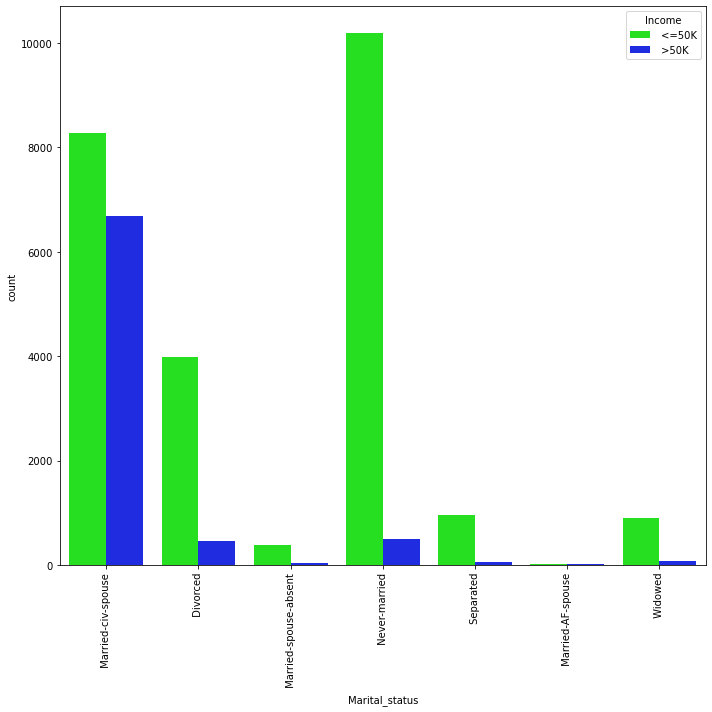

In [115]:
# Visualizing the relation between Marital status and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Marital_status'],hue=df['Income'],palette="hsv")
plt.xticks(rotation=90)
plt.show()

The people who are married are having income >=50K. And the people who are never married are majorly earning <=50K.

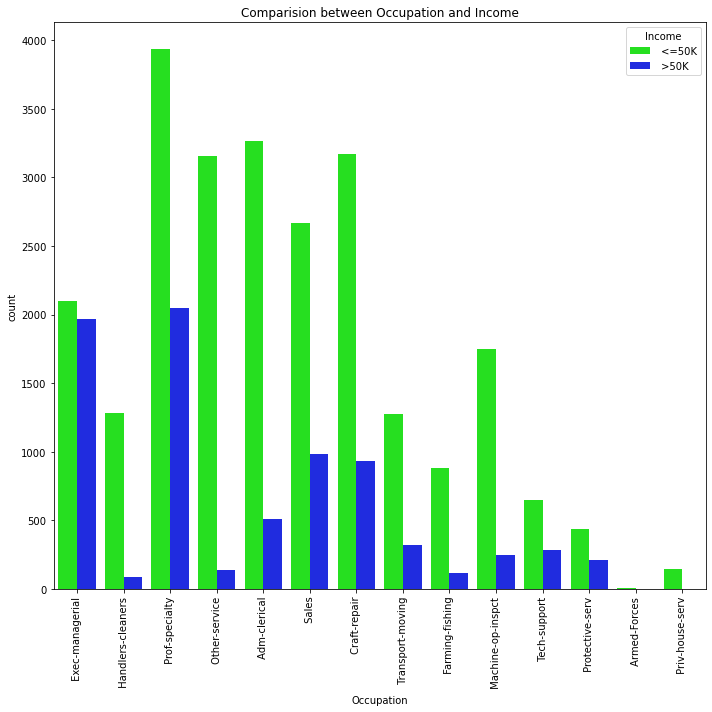

In [116]:
# Visualizing the relation between Occupation and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df["Occupation"],hue=df["Income"],palette='hsv')
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

Majority people who are in the position Prof-speciality, Other-service, Adm-clerical, Sales and Craft repair have the income more than 50K.

Very few people who are in the position Handlers-clearners, Farming fishing have income less than 50K.

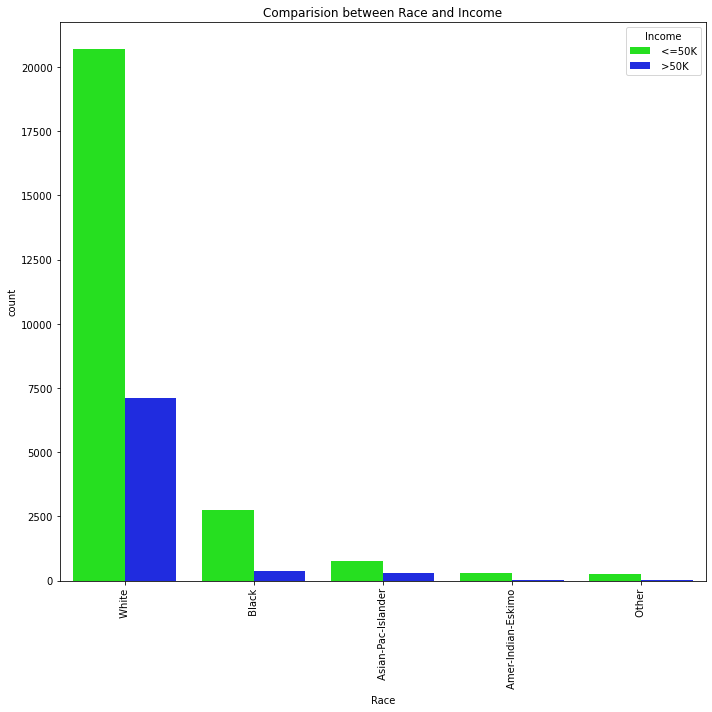

In [117]:
# Visualizing the relation between Race and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Race'],hue=df['Income'],data=df,palette="hsv")
plt.title("Comparision between Race and Income")
plt.xticks(rotation=90)
plt.show()


he White family groups have high income <50K compare to other racial groups.

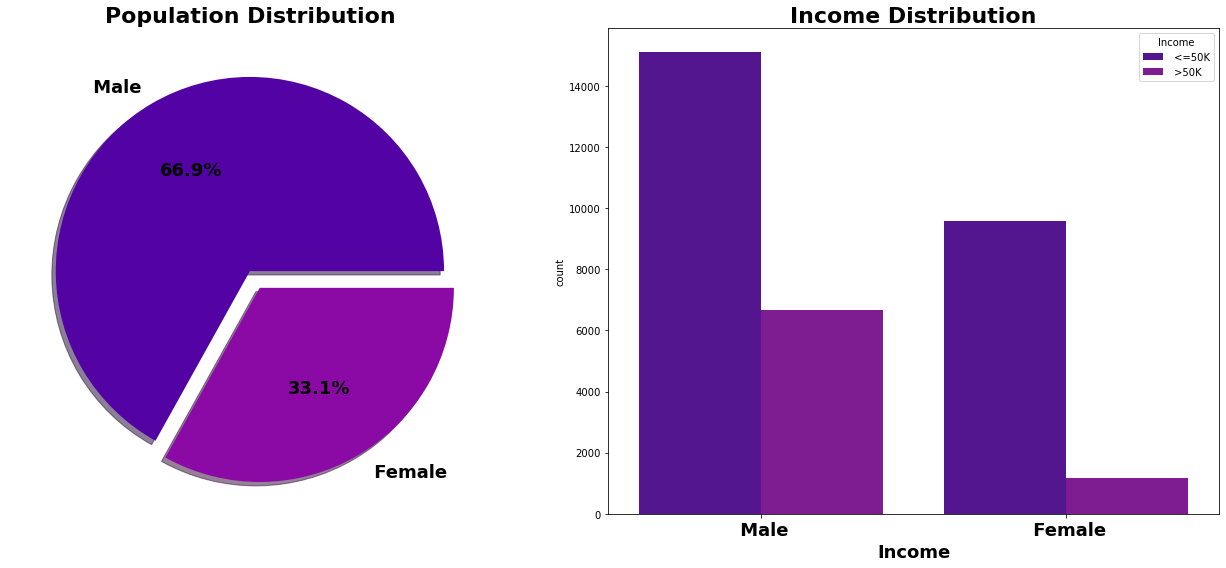

In [118]:
#Sex Vs Income
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Sex',hue=df['Income'] ,data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

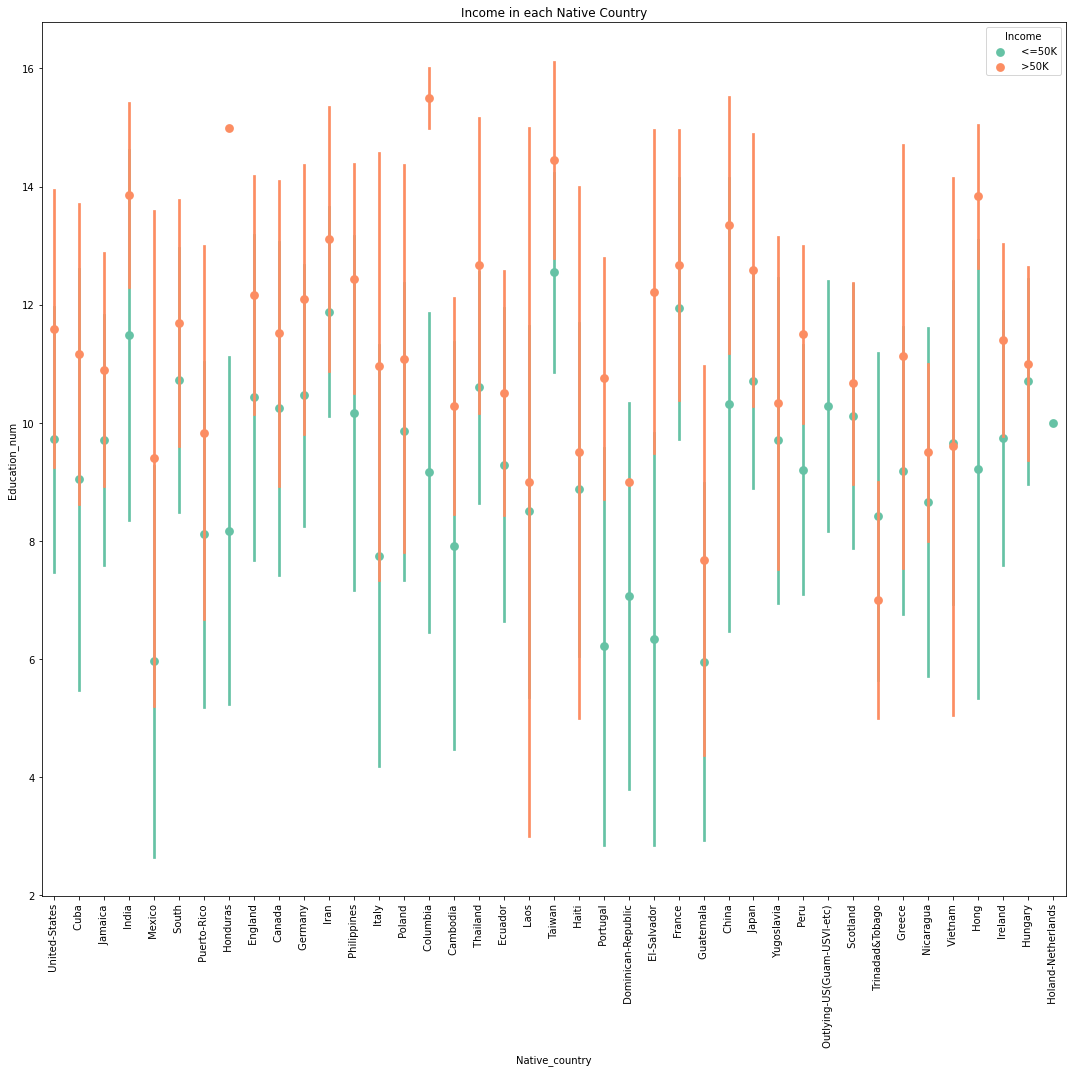

In [119]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

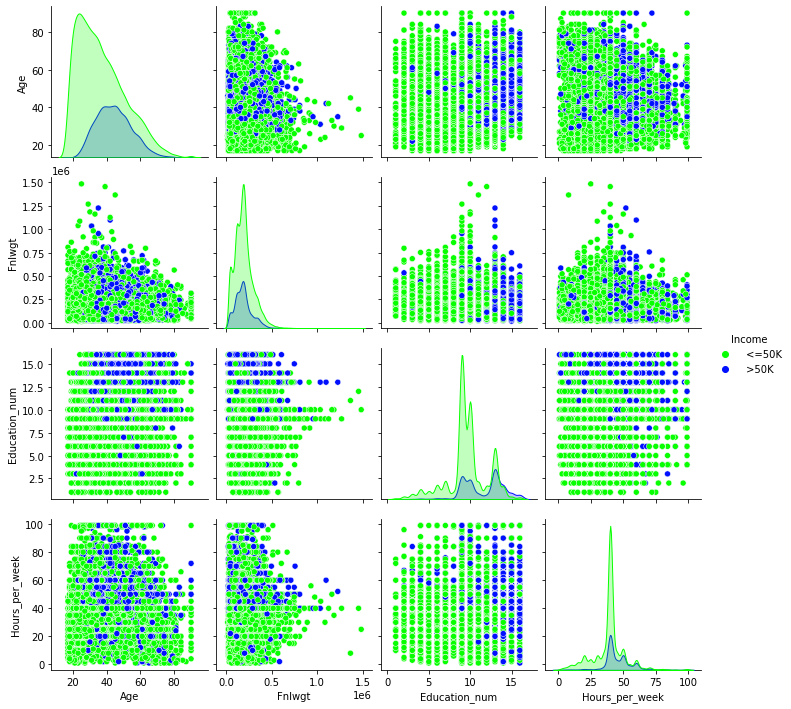

In [120]:
#Multivariate Analysis
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="hsv")

In [121]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_col:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,40,38,0


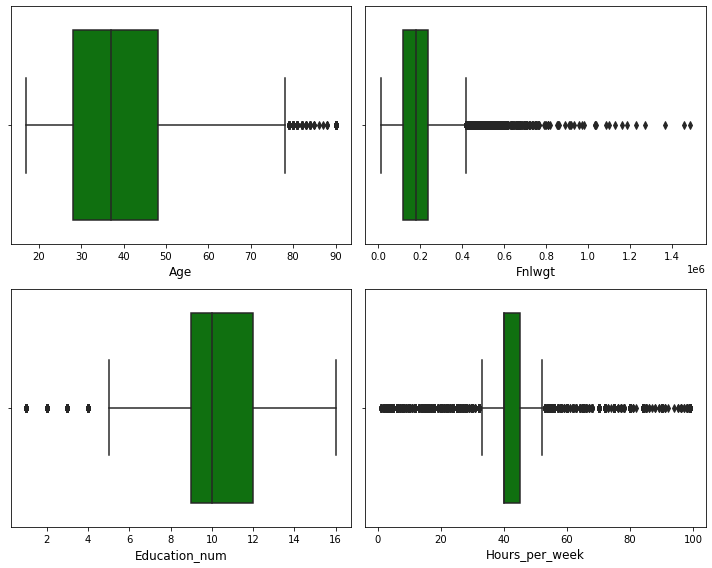

In [122]:
# Visualizing the outliers present in the numerical columns

plt.figure(figsize=(10,8),facecolor="white")
plotnumber=1

for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],color='g')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

From Boxplot we can see outliers exist dataset.

In [123]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [124]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (32560, 13)
Shape of the dataframe after removing outliers:  (29296, 13)
Percentage of data loss post outlier removal:  10.024570024570025


In [125]:
df=df1.copy()

In [126]:
df.skew()

Age               0.466130
Workclass         0.070097
Fnlwgt            0.629685
Education        -0.962352
Education_num    -0.134690
Marital_status   -0.021495
Occupation        0.012196
Relationship      0.788384
Race             -2.621072
Sex              -0.716832
Hours_per_week   -0.349106
Native_country   -5.522988
Income            1.198690
dtype: float64

Relationship,Sex,Native_country,Income, race,education are skewed but as they are categorical concept of skewness doesnot mean anything to it.

s we can see there is skewness in Fnlwgt column. Removing it using cube root method.

In [127]:
# Removing skewness using cube root method
df["Fnlwgt"] = np.cbrt(df['Fnlwgt'])
df.skew()

Age               0.466130
Workclass         0.070097
Fnlwgt           -0.382332
Education        -0.962352
Education_num    -0.134690
Marital_status   -0.021495
Occupation        0.012196
Relationship      0.788384
Race             -2.621072
Sex              -0.716832
Hours_per_week   -0.349106
Native_country   -5.522988
Income            1.198690
dtype: float64

In [128]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.035710,-0.065705,0.000202,0.056514,-0.286650,0.000461,-0.271447,0.023937,0.094581,0.096708,0.037398,0.250960
Workclass,0.035710,1.000000,-0.027263,0.003970,0.003318,-0.020893,0.007527,-0.056981,0.066726,0.071157,0.030861,0.002591,0.003126
Fnlwgt,-0.065705,-0.027263,1.000000,-0.022850,-0.034267,0.027674,0.002312,0.016561,-0.101696,0.017116,-0.019629,-0.097831,-0.005002
Education,0.000202,0.003970,-0.022850,1.000000,0.341329,-0.039258,-0.040958,-0.011651,0.027924,-0.028636,0.059657,0.090808,0.072818
Education_num,0.056514,0.003318,-0.034267,0.341329,1.000000,-0.065033,0.076785,-0.098228,0.086737,0.010800,0.165831,0.145917,0.338260
Marital_status,-0.286650,-0.020893,0.027674,-0.039258,-0.065033,1.000000,0.035595,0.184749,-0.087098,-0.130086,-0.198975,-0.032836,-0.197823
Occupation,0.000461,0.007527,0.002312,-0.040958,0.076785,0.035595,1.000000,-0.039158,0.002155,0.048131,-0.019702,0.019547,0.034128
Relationship,-0.271447,-0.056981,0.016561,-0.011651,-0.098228,0.184749,-0.039158,1.000000,-0.146090,-0.582759,-0.268848,-0.012434,-0.252750
Race,0.023937,0.066726,-0.101696,0.027924,0.086737,-0.087098,0.002155,-0.146090,1.000000,0.125525,0.059486,0.021396,0.098206
Sex,0.094581,0.071157,0.017116,-0.028636,0.010800,-0.130086,0.048131,-0.582759,0.125525,1.000000,0.242231,-0.008579,0.217668


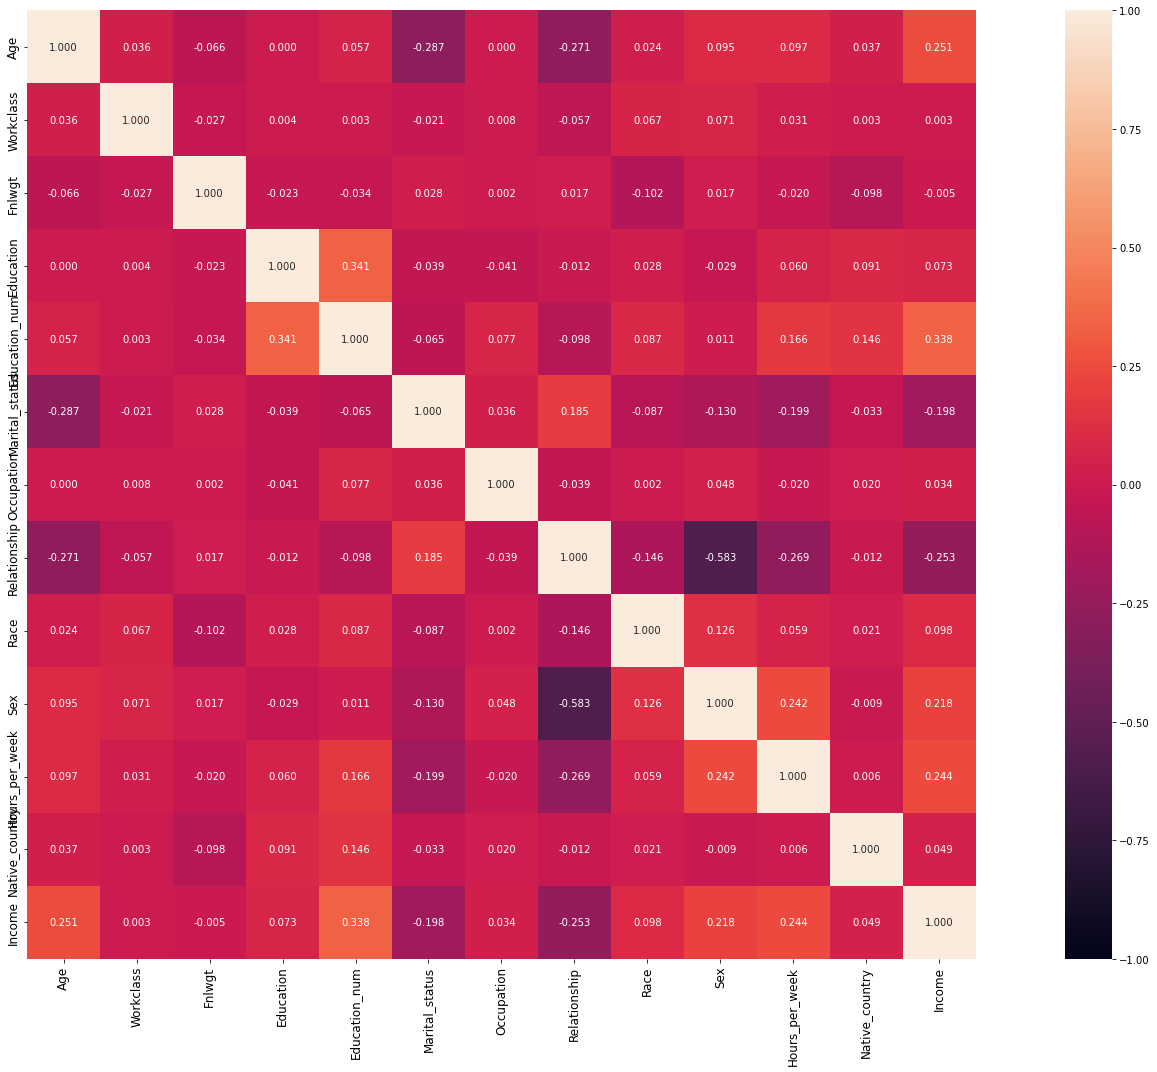

In [129]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10})
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.show()

This heatmap contains both positive and negative correlation.

There is no much correlation between the target and the label.

The columns Education_num, Age, Sex and Hours_per_week have positive correlation with the label.

The columns Relationship and Sex are highly correlated with each other also the column Fnlwgt has very has correlation with the label so we can drop this column.


In [130]:
df.drop('Fnlwgt',inplace=True,axis=1)

In [131]:
#Separating the features and label variables
x =df.drop("Income",axis=1)
y = df["Income"]

In [132]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.871596,1.728654,-0.352475,1.174956,-0.397702,-0.780169,-0.898303,0.341312,0.703887,-2.425287,0.184763
1,-0.026357,-0.079850,0.167627,-0.461048,-1.723346,-0.279307,-0.275290,0.341312,0.703887,-0.010438,0.184763
2,1.096084,-0.079850,-2.432887,-1.279050,-0.397702,-0.279307,-0.898303,-2.988936,0.703887,-0.010438,0.184763
3,-0.101187,-0.079850,0.427679,1.583958,-0.397702,-0.780169,2.216760,0.341312,-1.420683,-0.010438,0.184763
4,0.796766,-0.079850,-1.132630,-2.097052,0.265120,0.221555,-0.275290,-2.988936,-1.420683,-2.156971,-6.493615
...,...,...,...,...,...,...,...,...,...,...,...
29291,-0.849481,-0.079850,-0.872578,0.765955,-0.397702,1.473709,2.216760,0.341312,-1.420683,-0.189316,0.184763
29292,0.123301,-0.079850,0.167627,-0.461048,-0.397702,-0.028876,-0.898303,0.341312,0.703887,-0.010438,0.184763
29293,1.470231,-0.079850,0.167627,-0.461048,2.253585,-1.531461,1.593748,0.341312,-1.420683,-0.010438,0.184763
29294,-1.223628,-0.079850,0.167627,-0.461048,0.927941,-1.531461,0.970735,0.341312,0.703887,-1.799215,0.184763


In [133]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [134]:
y.value_counts()

0    22178
1    22178
Name: Income, dtype: int64

# Machine Learning Model Building

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [136]:
#Finding best random state
maxAccu = 0
maxRS = 0

for i in range (0,100):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.7539640790561358  on Random_State  76


In [137]:
#Creating train_test Split:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=76)

# LogisticRegression

In [138]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print('Acuracy score is- ' ,  accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Acuracy score is-  0.7539640790561358
[[4881 1722]
 [1552 5152]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      6603
           1       0.75      0.77      0.76      6704

    accuracy                           0.75     13307
   macro avg       0.75      0.75      0.75     13307
weighted avg       0.75      0.75      0.75     13307



# RandomForestClassifier

In [139]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.8704441271511235
[[5716  887]
 [ 837 5867]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6603
           1       0.87      0.88      0.87      6704

    accuracy                           0.87     13307
   macro avg       0.87      0.87      0.87     13307
weighted avg       0.87      0.87      0.87     13307



# DecisionTreeClassifier

In [140]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.8320432854888404
[[5554 1049]
 [1186 5518]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6603
           1       0.84      0.82      0.83      6704

    accuracy                           0.83     13307
   macro avg       0.83      0.83      0.83     13307
weighted avg       0.83      0.83      0.83     13307



In [141]:
svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.8182159765536935
[[5049 1554]
 [ 865 5839]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81      6603
           1       0.79      0.87      0.83      6704

    accuracy                           0.82     13307
   macro avg       0.82      0.82      0.82     13307
weighted avg       0.82      0.82      0.82     13307



# GradientBoostingClassifier

In [142]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
predgb = gb.predict(x_test)
print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test, predgb))

0.8472984143683775
[[5283 1320]
 [ 712 5992]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      6603
           1       0.82      0.89      0.86      6704

    accuracy                           0.85     13307
   macro avg       0.85      0.85      0.85     13307
weighted avg       0.85      0.85      0.85     13307



# Checking for cross validation score

In [143]:
#Checking cross validation score of LogisticRegression Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr,X,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())

Cross validation score for LogisticRegression is  0.7496619947531693


In [144]:
# Checking cross validation score of RandomForest Classifier:

scr = cross_val_score(RF,X,y,cv=5)
print('Cross validation score for RandomForest is', scr.mean())

Cross validation score for RandomForest is 0.8696697677226906


In [145]:
# Checking cross validation score of DecisionTree Classifier:
scr = cross_val_score(dt,X,y,cv=5)
print('Cross validation score for DecisionTree is ', scr.mean())

Cross validation score for DecisionTree is  0.831028368848394


In [146]:
# Checking cross validation score of SVC:

scr = cross_val_score(svc,X,y,cv=5)
print('Cross validation score for SVC is', scr.mean())

Cross validation score for SVC is 0.8161467610238281


In [147]:
# Checking cross validation score of GradientBoostingClassifier:

scr = cross_val_score(gb,X,y,cv=5)
print('Cross validation score for SVC is', scr.mean())

Cross validation score for SVC is 0.8411045977211284


so from the above training we can conclude that random forest classifier is our best model due to high accuacy and cross validation score

# Hyperparameter Tuning

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [150]:
GCV = GridSearchCV(RandomForestClassifier(),parameter)
GCV.fit(x_train,y_train)
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 70}

In [151]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 70, max_depth=20 ,max_features='auto')
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))

Accuracy Score :
 0.8746524385661681


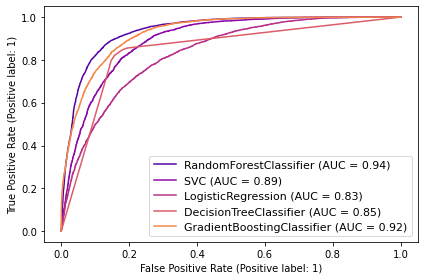

In [153]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(RF,x_test,y_test)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_) # ax_=Axes with confusion matrix
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax=disp.ax_)


plt.legend(prop={'size':11}, loc='lower right')
plt.show()

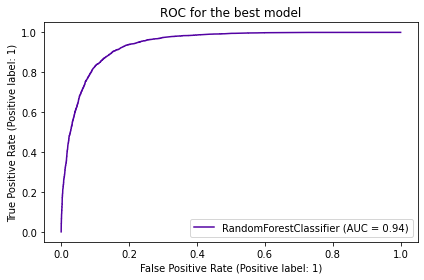

In [156]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(Final_mod, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

The Auc for the best model is 0.94

# Saving model

In [157]:
import joblib
joblib.dump(Final_mod,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']